In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import zipfile 

color_pal = sns.color_palette()

In [2]:
# Function to unzip a zip file 
def uzip_file(file_path):
    '''
    Take a zip file path and unzip the file in current directory 
    
    Args : 
        file_path (str) : file path with zip format

    Returns : 
        Unziped file and extract all files in current directory     
    '''

    # Create an instance of zip file to holds file path with zip format 
    zipfile_ = zipfile.ZipFile(file = file_path)
    # Extract all files from the zip file
    zipfile_.extractall()
    # close and appears all extracted files 
    zipfile_.close() 

In [3]:
uzip_file('/Users/sly/Desktop/Boston Housing Price/Data_source/archive-28.zip')

> # Goal : 
  - Building a regression model that predict house pricese in bosten 
    based on some features the provides on the data ..
> # Agenda : 
   - Loading the data try to understand it 
   - search for any thing that need preproceesing 
   - Understand the distrubutation of numerical data
   - look at categorical data 
   - check for any outliers (remove them if any )
   - preprering for build a model 
   - evaluate model using R2 - RMSE - MAE 
   - Tuning the model
   - Feature Enginerring

> # Loading in the data 


In [16]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing = pd.read_csv('/Users/sly/Desktop/Boston Housing Price/Data_source/housing.csv', header=None, delimiter=r"\s+", names=columns)
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [17]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> # Stats summatizing 

In [18]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# Check the missing values 
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
# Exploratory data analysis 
# Correlation 
corr_df = df_housing.corr()
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

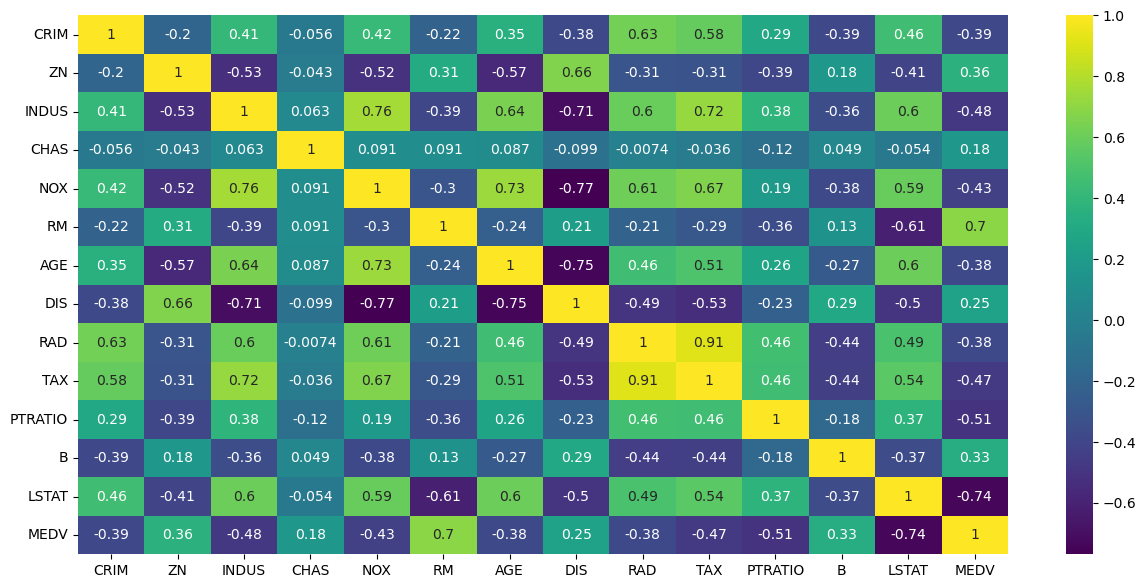

In [27]:
plt.figure(figsize= (15,7))
sns.heatmap(corr_df , annot= True , cmap= 'viridis' )

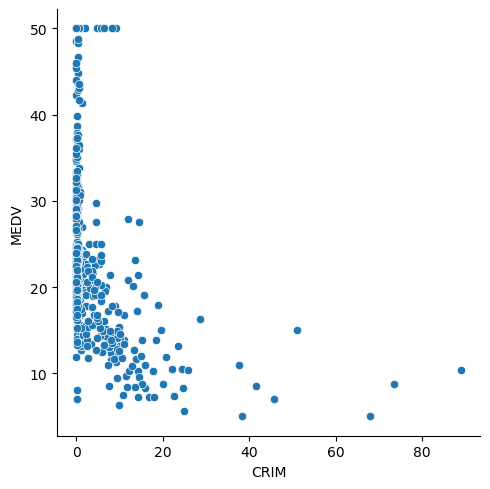

In [29]:
sns.relplot(data = df_housing , x = 'CRIM' , y= 'MEDV' )

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

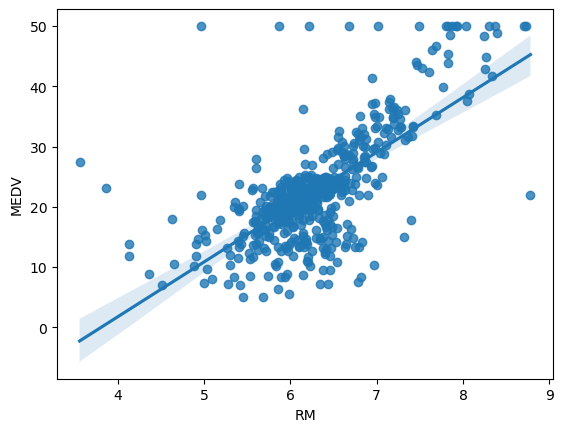

In [32]:
sns.regplot(data = df_housing , x = 'RM' , y= 'MEDV' )

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

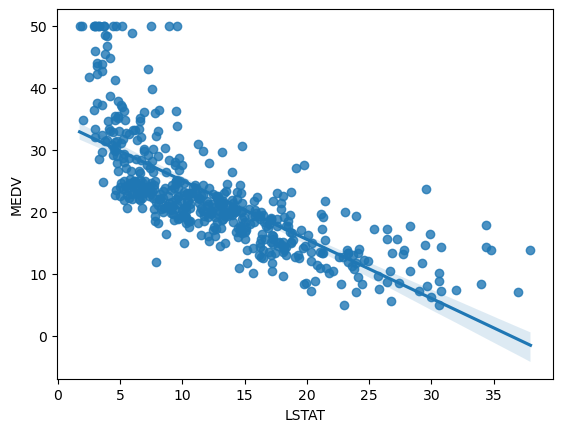

In [33]:
sns.regplot(data = df_housing , x = 'LSTAT' , y= 'MEDV' )

<AxesSubplot: xlabel='CHAS', ylabel='MEDV'>

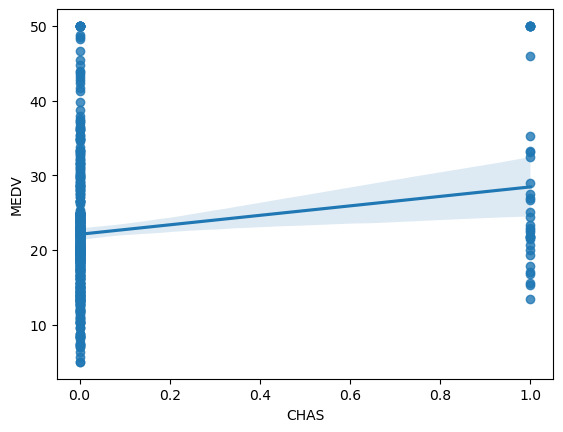

In [34]:
sns.regplot(data = df_housing , x = 'CHAS' , y= 'MEDV' )

<AxesSubplot: xlabel='PTRATIO', ylabel='MEDV'>

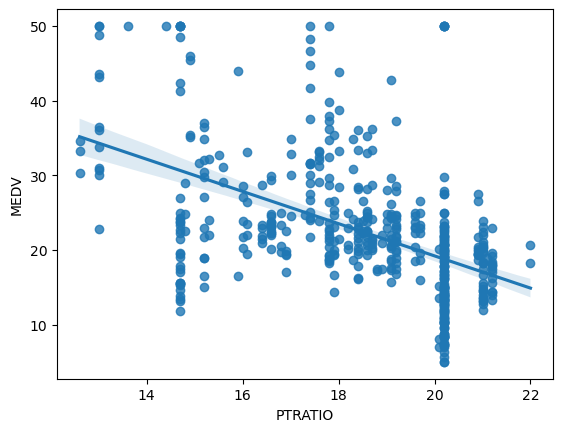

In [35]:
sns.regplot(data = df_housing , x = 'PTRATIO' , y= 'MEDV' )

In [36]:
# Create a x and y 
# holds independent and dependent features 
X = df_housing.copy()
y = X.pop('MEDV')

In [41]:
# Spliting the data into train and test splits 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 , random_state=42)

> # 

In [47]:
# Scalling the data importance making the model learns the patterns 
# and make the grident decent to covarge faster i have to scale the data 
# same scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
# Train the model 
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
# fit the model 
Lr.fit(x_train_scaled , y_train)

LinearRegression()

In [54]:
# Print the coffeicients and the intercept important things for each featrue 
print(Lr.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [55]:
print(Lr.intercept_)

23.01581920903955


In [56]:
# in whcih patameters the model has beem trained 
Lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [58]:
# Prediction with test data 
Lr_prediction = Lr.predict(x_test_scaled)

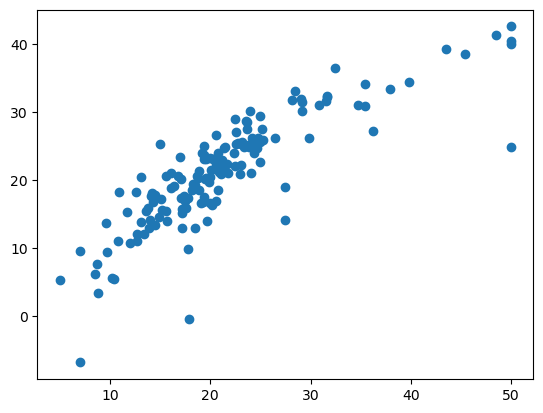

In [59]:
# Check the preformance important plots how the model is doing in hand of predicting 
# plot a Scatter plot for the prediction 
plt.scatter(y_test , Lr_prediction)

In [61]:
# Residuals the error between y_true and y_pred Difference 
residuals = y_test - Lr_prediction
residuals


173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: MEDV, Length: 152, dtype: float64

/var/folders/wv/l4z1p2yj40j1s8zljjmbzxcc0000gn/T/ipykernel_14713/1354413522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals , kde = True)


<AxesSubplot: xlabel='MEDV', ylabel='Density'>

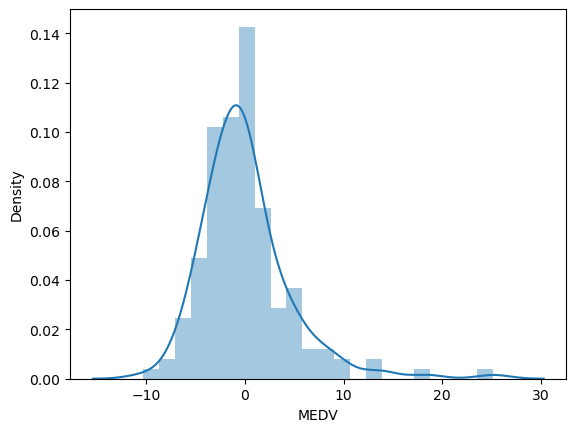

In [66]:
# ploting the residuals
sns.distplot(residuals , kde = True)

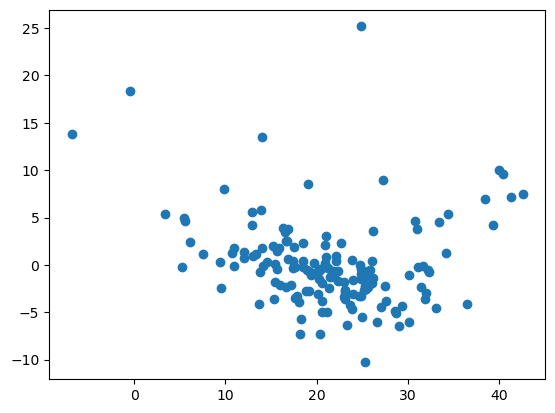

In [67]:
# Scatter plot with respect to residual to predicitons 
plt.scatter(Lr_prediction , residuals)

In [68]:
# Evaluating model using metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

print(mean_absolute_error(y_pred= Lr_prediction , y_true = y_test))
print(mean_squared_error(y_pred= Lr_prediction , y_true = y_test))
print(np.sqrt(mean_squared_error(y_pred= Lr_prediction , y_true = y_test)))

3.1627098714574053
21.517444231177205
4.6386899261728205


In [ ]:
# R square - Adjusted R square 


> # R square - Adjusted R square 

In [70]:
score = r2_score(y_test , Lr_prediction)
score

0.7112260057484934

In [71]:
# Adjusted R squared 
1 - (1-score) * (len(y_test) - 1 )/ (len(y_test) - x_test.shape[1] - 1)

0.6840226584639312

In [73]:
# Pickling the model file for deployment with help docker and git actions
import pickle
pickle.dump(file=open(('reg_model.pkl'),'wb') , obj= Lr)

In [81]:
pickled_model = pickle.load(open('reg_model.pkl' , 'rb'))
pickled_model.predict(x_test_scaled)

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98